# Open Data with CMS - outreach and education

### What is Open Data and why is it important?

<img src = "https://yt3.ggpht.com/a-/ACSszfENmQ2SCS7AnguI8q_ZZlNl2Ne_CC0n2lA_xA=s900-mo-c-c0xffffffff-rj-k-no" align = "right"  style = "height:200px" >

CMS produces a huge amount of data and releases it publicly in a manner very few other experiments at the top of their relative fields do. On one hand that data is very easily available to the general public, on the other it is a bit cryptic to use without someone experienced at hand to explain a few things. Here we aim to present some tools to make it very easy and fast to use.

Obviously the data is very important to the scientists or we wouldn't be doing this experiment. It is also very valuable that it can be shared with others: it can make it easier for non-scientists to understand what your work is about, it can give educators interesting tools that promote modern research, it can hook a curious student to get into sciences and so forth. Especially in education there is this problem of "relevance" and "authenticity", ie. how do things done in school relate to the students' lives or to what is actually happening in scientific research today, and using actual data from actual research (from experiments obviously unperformable in classrooms) might prove to be an important asset in closing that gap. 

### So how do we do it?

<img src = "https://cdn-images-1.medium.com/max/346/0*I3hkRieQ6B3qwwhy." align = "right" style = "height:200px">

There are a few ways. You could use event visualizers, spreadsheet programs, particle physics masterclass materials and what not, all of which can be found through [the Open Data portal](http://opendata.cern.ch/), but the one we'll focus on here is Jupyter. You are currently reading a Jupyter notebook, an interactive file that can trivially incorporate text, pictures, animations and most importantly, code. It can support many languages, but we'll use Python 3 here as it is intuitive enough to be used even with people who have absolutely no programming background.

Best thing is that you can add to it on the fly and let people explore the data as they want without them needing to install anything. Especially in education: people hate it when they have to install things and learn to use a bunch of programs they might use every now and then (or just once), teenagers even more so. With Jupyter you don't have to: we can use [MyBinder](www.mybinder.org) to create a virtual workspace and get to work in a minute or two without any hassle, completely browser-based. There are also others, like Google's [colab](https://colab.research.google.com), if it suits your preferences better.  

CERN's own [SWAN](https://swan.web.cern.ch/) (Service for Web based ANalysis) is also be based on Jupyter, though it requires you to have CERNbox.

OF NOTE, this document is meant for Jupyter and Python 3, especially with Binder, so other platforms may require a bit of juggling to get things right. 

### Right, let's get some examples on the table.

As you can see (and test by double clicking around), this document is made of *cells*. Those can have either text (in markdown format) or code in them. To run a cell, select it (so it gets green) and press *ctrl + Enter*. On the left side of the code cells there's a [ ]. If it is empty, the cell has not been run. If it shows an asterisk, the cell is running. If there is a number, it has been run.

If the system somehow gets stuck, just select *Kernel $\rightarrow$ Restart & Clear Output* from the upper menus. This clears any weird leftovers or hangups that might be left in the kernel. If otherwise unsure of commands, press **h** when no cells are chosen to bring up key bindings.


In [1]:
# This notebook runs on Python 3, so we need to import some modules.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

When that is done, let's get some data in here. We'll use the 2012 sample and a dataset comprising of events where exactly two muons were detected without worrying about any trigger selections (using code similar to the one used in [record 552](http://opendata.cern.ch/record/552)).

This is an example of a simplified derived dataset, but you could very well use any set you want to make from the openly published results. All derived sets can be found from [here](
http://opendata.cern.ch/search?page=1&size=20&q=&experiment=CMS&type=Dataset&subtype=Derived).

In [2]:
muons = pd.read_csv('http://opendata.cern.ch/record/545/files/Dimuon_DoubleMu.csv')

Getting a picture of "what does particle physics data actually look like" can be a bit hard for those who don't practise it. It's easy to show them, just run the cell below.

In [3]:
# This shows top 5 rows of data, though you can put a desired number in the parentheses.

muons.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159


Okay, seems legit. That is still a bit dense if left up to the reader, but with a bit of helpful explaining or physics background it starts to make sense. Importantly we can show that there is quite a lot of it, which means it's going to require computers and programming to analyze it.

In [4]:
# This shows the number of rows in the data.

len(muons)

100000

Though that number seems small to people who are used to these experiments, it is still a huge number for others. It also doesn't tell us anything, whereas a good graphical visualization does. So let's plot a histogram.

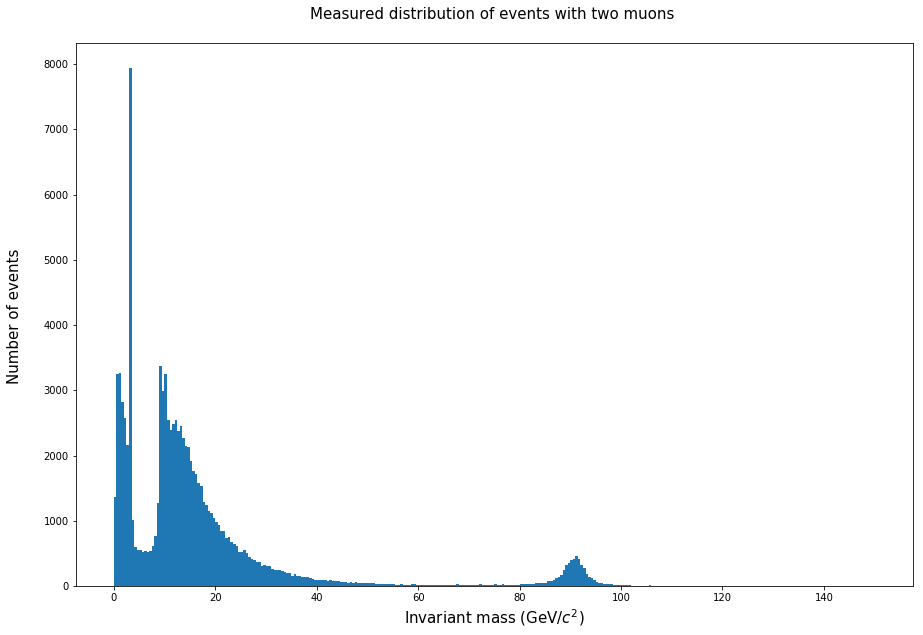

In [5]:
fig = plt.figure(figsize=(15, 10))

plt.hist(muons.M, 300, range = (0,150))

plt.xlabel('Invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Measured distribution of events with two muons \n', fontsize = 15)

plt.show()

As a sidenote: if you're using a dataset that doesn't have invariant mass already computed in it, you could just as easily create a new variable from the existing data and use that for plotting.

In [6]:

invMassSqrd = (muons.E1 + muons.E2)**2 - ((muons.px1 + muons.px2)**2 +(muons.py1 + muons.py2)**2  +(muons.pz1 + muons.pz2)**2)
invMass = np.sqrt(invMassSqrd[(invMassSqrd >0)])

invMass.head()

0    17.492090
1    11.553492
2     9.163692
3    12.477448
4    14.315904
dtype: float64

Now that we see how the data plots out, we can focus on using it to show different things to the intended audience. Say you want to show them the bump at 90 GeV, for an example. Let's extract those results that fall within 80-100 GeV.

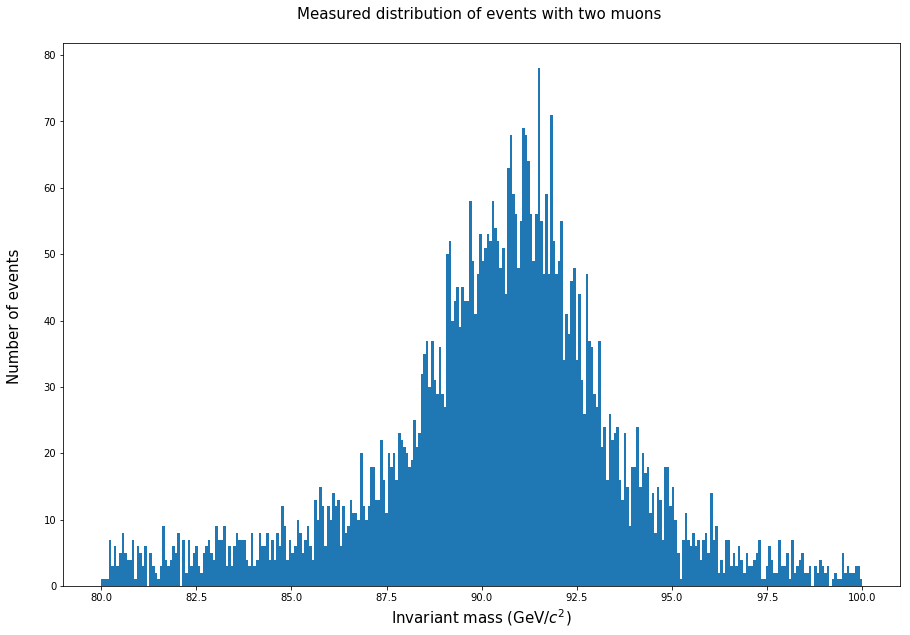

In [7]:
bump = muons[(muons.M >= 80) & (muons.M <= 100)]

fig = plt.figure(figsize=(15, 10))

plt.hist(bump.M, 300, range = (80,100))

plt.xlabel('Invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Measured distribution of events with two muons \n', fontsize = 15)

plt.show()

Let's follow with a question "how do these correlate with energies the measured particles have"? You can set the desired threshold for high $p_t$ in the code below and see how it changes the plot. At which point does the low part stop to contribute?

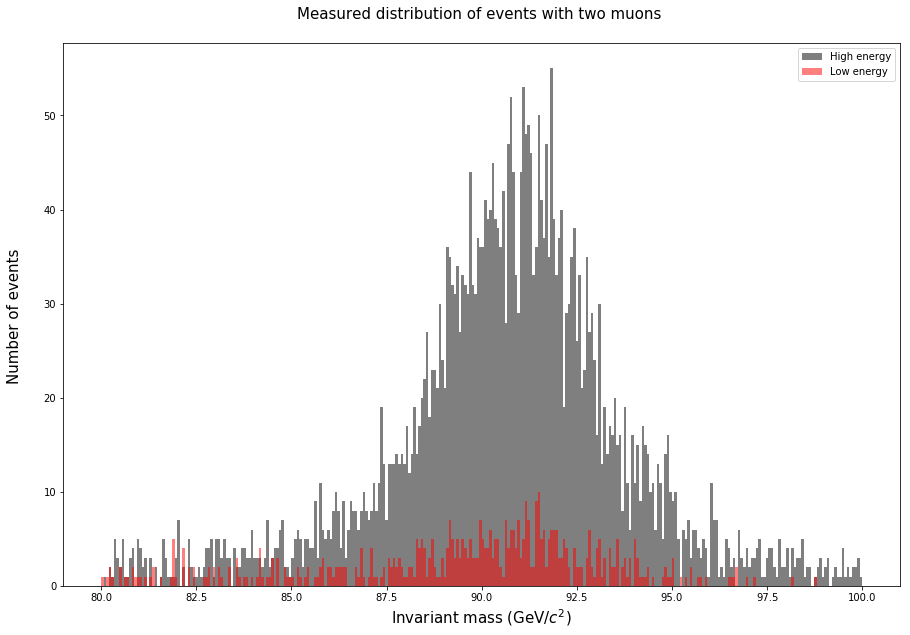

In [8]:
threshold = 30

highE = bump[(bump.pt1 >= threshold) & (bump.pt2 >= threshold)]
lowE = bump[(bump.pt1 < threshold) & (bump.pt2 < threshold)]

fig = plt.figure(figsize=(15, 10))

plt.hist(highE.M, 300, range = (80,100), alpha = 0.5 , color = 'black', label = 'High energy')
plt.hist(lowE.M, 300, range = (80,100), alpha = 0.5 , color = 'red', label = 'Low energy')

plt.xlabel('Invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Measured distribution of events with two muons \n', fontsize = 15)
plt.legend()

plt.show()

We could also try to find out how the measurements are spread spatially.

In [9]:
prapMuons = pd.concat([muons['eta1'],muons['eta2']])
degMuons = prapMuons.copy()
degMuons[:]=[2*np.arctan(np.exp(x))*360/(2*np.pi) for x in degMuons]

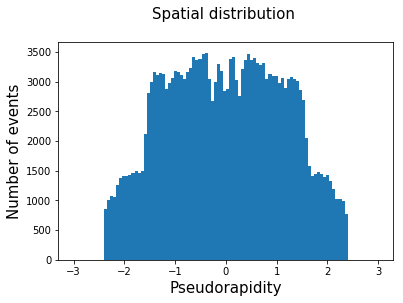

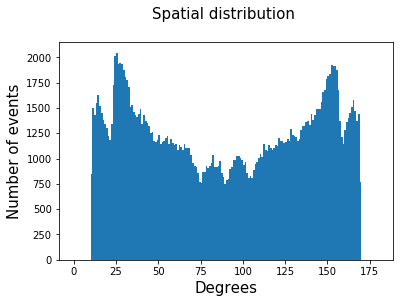

In [10]:
plt.hist(prapMuons, bins=100, range=(-3,3))

plt.xlabel('Pseudorapidity', fontsize=15)
plt.ylabel('Number of events', fontsize=15)
plt.title('Spatial distribution \n', fontsize=15)

plt.show()

plt.hist(degMuons, bins=180, range=(0,180))

plt.xlabel('Degrees', fontsize=15)
plt.ylabel('Number of events', fontsize=15)
plt.title('Spatial distribution \n', fontsize=15)

plt.show()

There is certainly a dip in the middle. Could it have something to do with the $p_t$?

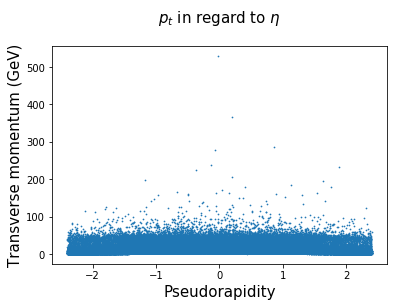

In [ ]:
transverse = pd.concat([muons.pt1,muons.pt2])
plt.scatter(prapMuons, transverse, s=0.5)

plt.title('$p_t$ in regard to $\eta$ \n', fontsize=15)
plt.xlabel('Pseudorapidity', fontsize=15)
plt.ylabel('Transverse momentum (GeV)', fontsize=15)

plt.show()

plt.scatter(prapMuons, transverse, s=0.5)

plt.ylim(0,6)

plt.title('$p_t$ in regard to $\eta$ \n', fontsize=15)
plt.xlabel('Pseudorapidity', fontsize=15)
plt.ylabel('Transverse momentum (GeV)', fontsize=15)

plt.show()

We could also use pseudorapidity to see how accurately we can measure things dependant on the angle.

In [ ]:
high = 1.5
low = 0.88

# Check the whole data.

highEta = muons[(abs(muons.eta1) >= high) & (abs(muons.eta2) >= high)]
lowEta = muons[(abs(muons.eta1) < low) & (abs(muons.eta2) < low)]

# Or uncomment and run this to check the 90 GeV bump (which was defined a bit above).

# highEta = bump[(abs(bump.eta1) >= high) & (abs(bump.eta2) >= high)]
# lowEta = bump[(abs(bump.eta1) < low) & (abs(bump.eta2) < low)]

In [ ]:
fig = plt.figure(figsize=(10, 8))

h = len(highEta)
l = len(lowEta)

plt.hist(highEta.M, bins=300, range=(0,100), alpha=0.5, label='High $\eta$, n = %i' %h, facecolor='black')
plt.hist(lowEta.M, bins=300, range=(0,100), alpha=0.5, label='Low $\eta$, n = %i' %l)

# Adjust range and ylim accordingly, if you want to focus on the bump.

plt.ylim(0,1500)

plt.xlabel('Invariant mass [GeV/c²]', fontsize=15)
plt.ylabel('Number of events', fontsize=15)
plt.title('Detected muons in regard to $\eta$ \n', fontsize=15)
plt.legend (loc='upper right', fontsize=15)

plt.show()

While more proper and complex curve fits take a bit more effort, you can also pretty easily show some rough distributions on the fly. For a more rigorous show you could use something like ROOT, but that can get a bit burdensome for some situations. Let's take a look at the J/$\psi$ peak with nimble Python.

In [ ]:
fig = plt.figure(figsize=(15, 10))

lower = 2.8
upper = 3.4

fit_i = 3.05
fit_f = 3.15

jpsi = muons[(muons.M >= lower) & (muons.M <= upper)]
fit = muons[(muons.M >= fit_i) & (muons.M <= fit_f)]

coefficient = len(fit)/len(jpsi)
(mu, sigma) = norm.fit(fit.M)

n, bins, patches = plt.hist(jpsi.M, 300, density = 1, facecolor = 'b', alpha=0.5, histtype='stepfilled',
                            range=(lower, upper))

y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 6)

plt.xlabel('Invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Probability \n', fontsize = 15)
plt.title( 'J/$\psi$ normed to one   $\mu$ = %f , $\sigma$ = %f \n' %(mu,sigma), fontsize=15)

cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_ticks([])

plt.show()


### Feedback & thanks for all the fish 

Thank you for participating!

If you could spare a minute or two and give us some feedback [here](https://goo.gl/forms/qE5g0dzQyLNKJvZw1), we'd appreciate it a lot.